In [1]:
import matplotlib.pyplot as plt
import numpy as np

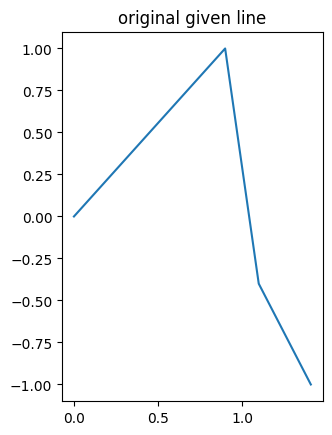

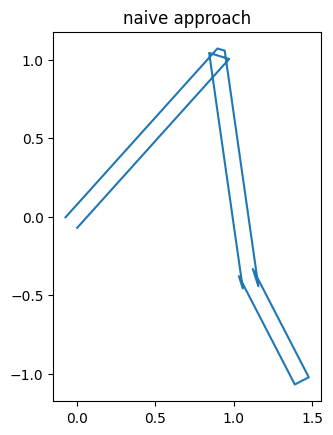

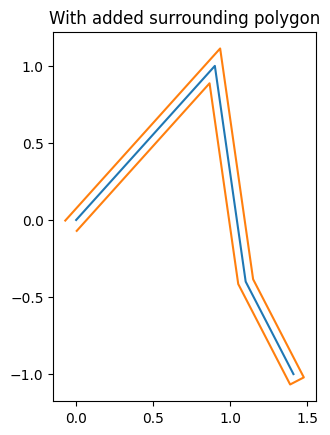

In [2]:
width = 0.1


class Line:
    def __init__(self, a, b=None, diff=None):
        self.start = a
        if diff is not None:
            self.diff = diff
        else:
            self.diff = b - a

    @property
    def end(self):
        return self.start + self.diff

    def get(self):
        return self.start, self.start + self.diff

    def mag(self):
        return np.linalg.norm(self.diff)

    def unit_vec(self):
        return self.diff / self.mag()

    def clockwise_unit(self):
        unit_vec = self.unit_vec()
        return np.array([unit_vec[1], -unit_vec[0]])

    def counter_clockwise_unit(self):
        return -1 * self.clockwise_unit()

    def clockwise(self):
        return Line(
            self.start
            + -self.unit_vec() * width / 2  # shift back
            + self.clockwise_unit() * width / 2,  # shift sideway
            diff=self.unit_vec() * (self.mag() + width / 2 * 2),
        )

    def counter_clockwise(self):
        return Line(
            self.start
            + -self.unit_vec() * width / 2  # shift back
            + self.counter_clockwise_unit() * width / 2,  # shift sideway
            diff=self.unit_vec() * (self.mag() + width / 2 * 2),
        )


lines = [
    Line(np.array([0, 0]), np.array([0.9, 1.0])),
    Line(np.array([0.9, 1.0]), np.array([1.1, -0.4])),
    Line(np.array([1.1, -0.4]), np.array([1.41, -1])),
]


def to_points(_line):
    pts = []
    for l in _line:
        pts.extend(l.get())
    return pts


def plot(_pts):
    plt.plot(*np.array((_pts)).T)


def line_intersection(line1, line2):
    xdiff = (line1.start[0] - line1.end[0], line2.start[0] - line2.end[0])
    ydiff = (line1.start[1] - line1.end[1], line2.start[1] - line2.end[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    #     print(line1.start, line1.end, line2.start, line2.end)
    #     print("---", div)
    if div == 0:
        raise Exception("lines do not intersect")

    d = (det(line1.start, line1.end), det(line2.start, line2.end))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return np.array([x, y])


def get_polygon(_lines):
    pts = []

    last_boarder_line = _lines[0].clockwise()
    pts.append(last_boarder_line.start)
    for i in range(len(_lines) - 1):
        #         print("line", _lines[i].clockwise().start, _lines[i].clockwise().end)
        #         print("line", _lines[i + 1].clockwise().start, _lines[i + 1].clockwise().end)
        pts.append(line_intersection(_lines[i].clockwise(), _lines[i + 1].clockwise()))
    #         print(_lines[i].clockwise().end)
    #         print(pts[-1])

    pts.append(_lines[-1].clockwise().end)

    _pts = []

    last_boarder_line = _lines[0].counter_clockwise()
    _pts.append(last_boarder_line.start)
    for i in range(len(_lines) - 1):
        _pts.append(
            line_intersection(
                _lines[i].counter_clockwise(), _lines[i + 1].counter_clockwise()
            )
        )

    _pts.append(_lines[-1].counter_clockwise().end)
    return pts + list(reversed(_pts))


def show_plot(title):
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.show()


plot(to_points(lines))
show_plot("original given line")

plot(
    to_points([l.clockwise() for l in lines])
    + list(reversed(to_points(([l.counter_clockwise() for l in lines]))))
)
show_plot("naive approach")

plot(to_points(lines))
plot(get_polygon(lines))
show_plot("With added surrounding polygon")